In [72]:
import pandas as pd

In [73]:
#第1題
df = pd.read_csv('Churn_Modelling.csv')

#檢查遺漏值
print("\n每個欄位的遺漏值個數：")
print(df.isnull().sum())


每個欄位的遺漏值個數：
CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64


In [74]:
#第2題
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

print(df.isnull().sum())#填入後印出可看到已無遺漏值

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64


In [75]:
#第3題
df.rename(columns={'CredRate': 'CreditScore',
                   'ActMem': 'IsActiveMember',
                   'Prod Number': 'NumOfProducts',
                   'Exited': 'Churn'}, inplace=True)

#列印新欄位名稱
for column_name in df.columns:
    print(column_name)

CustomerId
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Churn


In [76]:
#第4題

#移除CustomerId欄位
df.drop('CustomerId', axis=1, inplace=True)

#將指定欄位的資料型態修改為category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['Churn'] = df['Churn'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')

#印出所有欄位的資料型態，並存成新的 CSV 檔
print(df.dtypes)
df.to_csv('new_file.csv', index=False)

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object


In [77]:
#第5題-(1)
card_counts = df['HasCrCard'].value_counts()

card_yes = card_counts[1]
card_no = card_counts[0]

total = card_yes + card_no
card_yes_ratio = card_yes / total
card_no_ratio = card_no / total

print(f"持有信用卡比例: {card_yes_ratio:.2%}")
print(f"不持有信用卡比例: {card_no_ratio:.2%}")

持有信用卡比例: 70.55%
不持有信用卡比例: 29.45%


In [78]:
#第5題-(2)
churn_counts = df['Churn'].value_counts()

churn_yes = churn_counts[1]
churn_no = churn_counts[0]

total = churn_yes + churn_no
churn_ratio = churn_yes / total

print(f"客戶流失比例: {churn_ratio:.2%}")

客戶流失比例: 20.37%


In [79]:
#第5題-(3)
active_counts = df['IsActiveMember'].value_counts()

active_yes = active_counts[1]
active_no = active_counts[0]

total = active_yes + active_no
active_ratio = active_yes / total

print(f"仍然是活躍狀態的客戶比例: {active_ratio:.2%}")

仍然是活躍狀態的客戶比例: 51.51%


In [80]:
#第5題-(4)

#先將資料依照Churn分為兩塊
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]

churned_customers_numeric = churned_customers.select_dtypes(include='number')
churned_mean = churned_customers_numeric.mean()
non_churned_customers_numeric = non_churned_customers.select_dtypes(include='number')
non_churned_mean = non_churned_customers_numeric.mean()

print("流失客戶的資料平均值:")
print(churned_mean)
print("\n未流失客戶的資料平均值:")
print(non_churned_mean)

流失客戶的資料平均值:
CreditScore           645.351497
Age                    44.837997
Tenure                  4.932744
Balance             91108.539337
NumOfProducts           1.475209
EstimatedSalary    101465.677531
dtype: float64

未流失客戶的資料平均值:
CreditScore          651.853196
Age                   37.411277
Tenure                 5.033279
Balance            72745.296779
NumOfProducts          1.544267
EstimatedSalary    99718.932023
dtype: float64


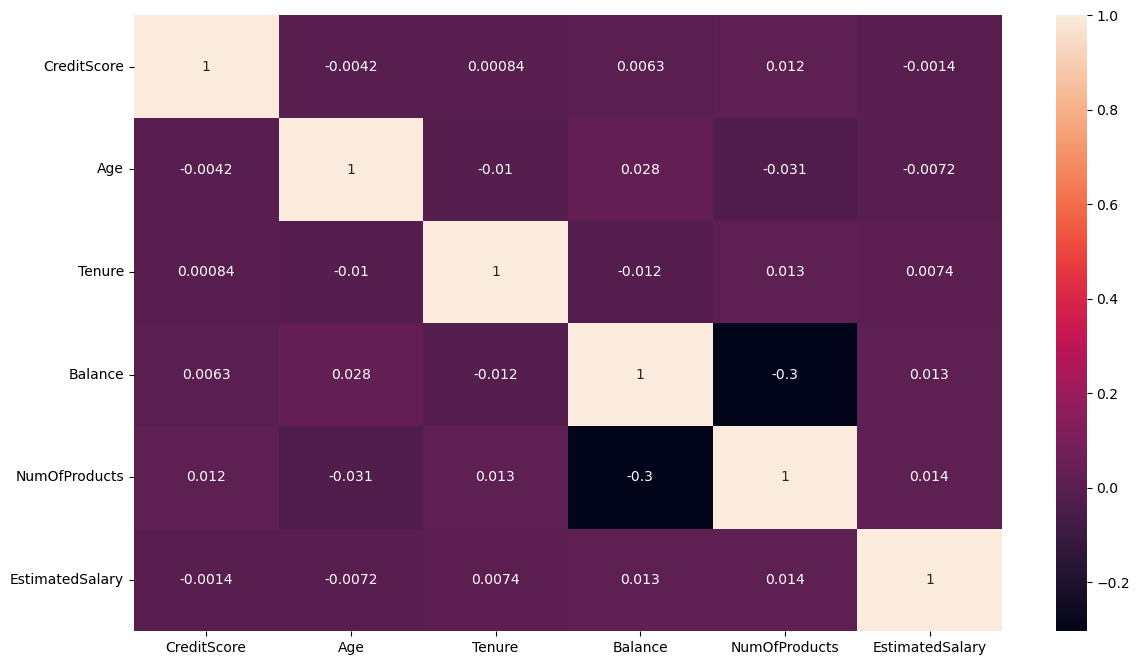

In [81]:
#第5題-(5)
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

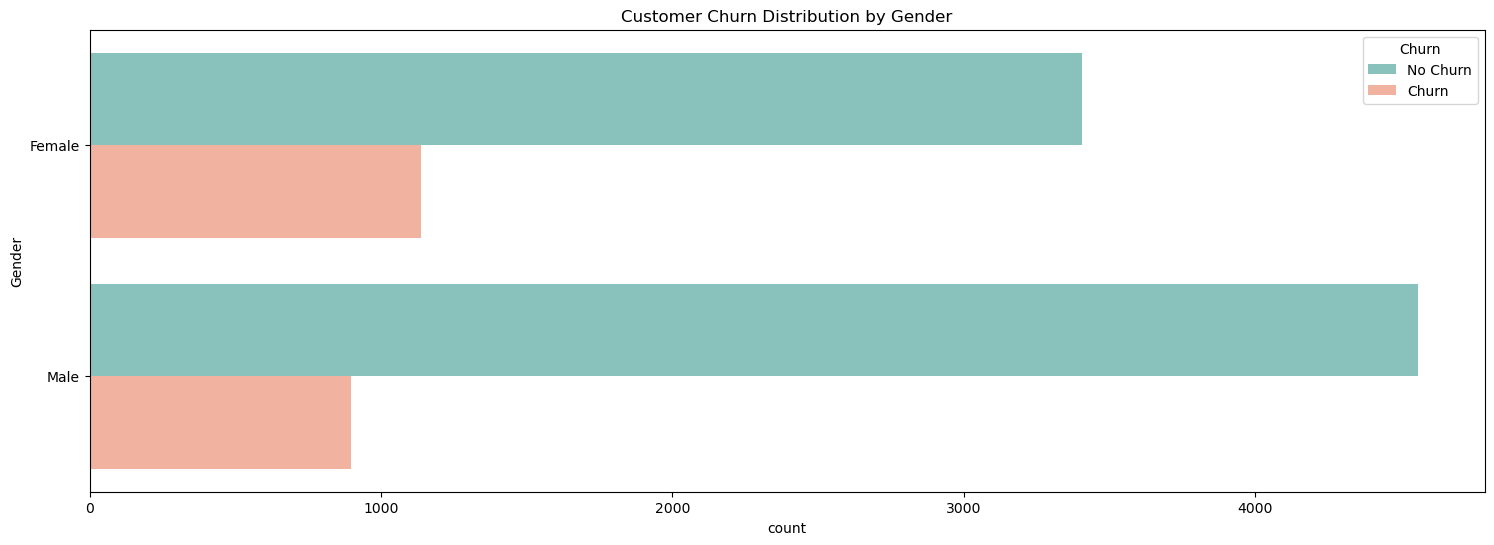

In [82]:
#第6題-(1)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
my_palette = ["#80CBC4", "#FFAB91"] 
sns.countplot(y='Gender', hue='Churn', data=df, palette=my_palette)
plt.title('Customer Churn Distribution by Gender')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

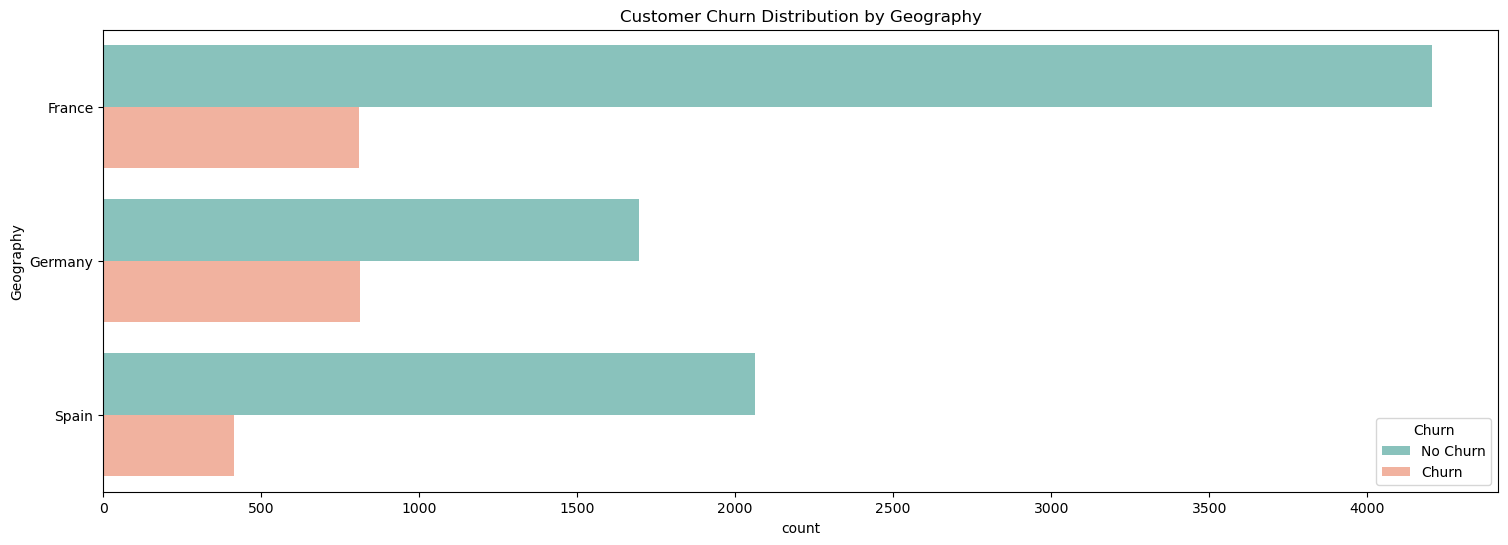

In [83]:
#第6題-(2)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
my_palette = ["#80CBC4", "#FFAB91"] 
sns.countplot(y='Geography', hue='Churn', data=df, palette=my_palette)
plt.title('Customer Churn Distribution by Geography')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

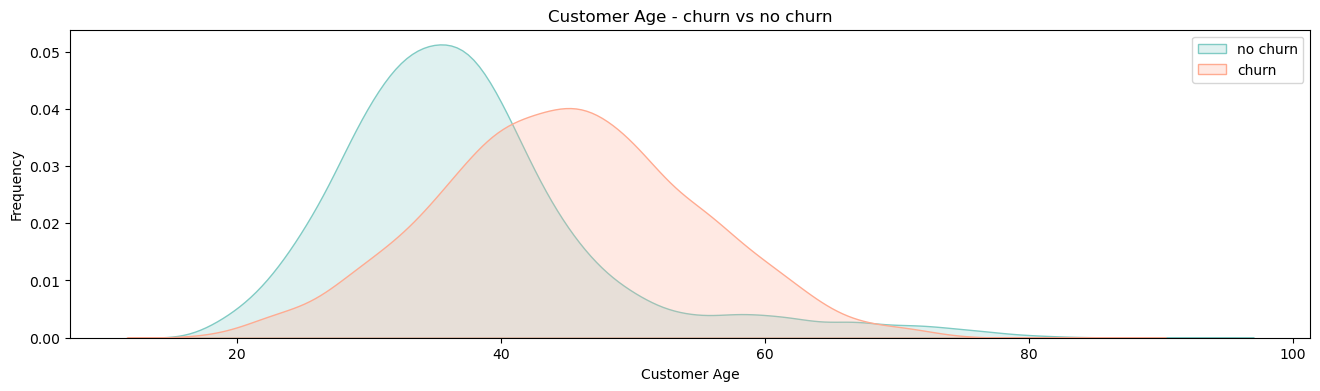

In [84]:
#第6題-(3)
import seaborn as sns
import matplotlib.pyplot as plt

#先將資料依照Churn分為兩塊
not_churned_customers = df[df['Churn'] == 0]
churned_customers = df[df['Churn'] == 1]

plt.figure(figsize=(16, 4))
sns.kdeplot(data=not_churned_customers, x='Age', fill=True, color='#80CBC4', label='no churn')
sns.kdeplot(data=churned_customers, x='Age', fill=True, color='#FFAB91', label='churn')
plt.title('Customer Age - churn vs no churn')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

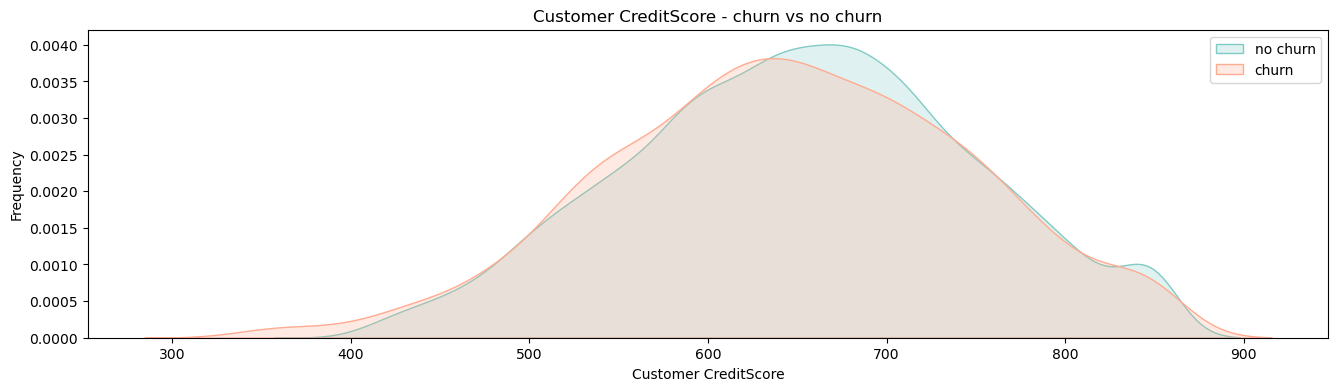

In [85]:
#第6題-(4)
import seaborn as sns
import matplotlib.pyplot as plt

#先將資料依照Churn分為兩塊
not_churned_customers = df[df['Churn'] == 0]
churned_customers = df[df['Churn'] == 1]

plt.figure(figsize=(16, 4))
sns.kdeplot(data=not_churned_customers, x='CreditScore', fill=True, color='#80CBC4', label='no churn')
sns.kdeplot(data=churned_customers, x='CreditScore', fill=True, color='#FFAB91', label='churn')
plt.title('Customer CreditScore - churn vs no churn')
plt.xlabel('Customer CreditScore')
plt.ylabel('Frequency')
plt.legend()
plt.show()